# Salary_hike -> Build a prediction model for Salary_hike

## <u> Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

## <u> Importing dataset

In [2]:
df = pd.read_csv("Salary_Data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## <u>Null values checking 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


## <u>Correlation 

In [4]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


### <u> Rename the Column Name 

In [5]:
# Renaming the YearsExperience Column As Yrexp

In [6]:
df1 = df.rename({'YearsExperience':'Yrexp'}, axis=1)
df1.head()

,Yrexp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## We need to check whether duplicate values are present or not 

In [7]:
df1[df1.duplicated(keep = False)]

,Yrexp,Salary


#### There is no duplicate data present in side the data set

## Check whether outliers are present inside the data or not 

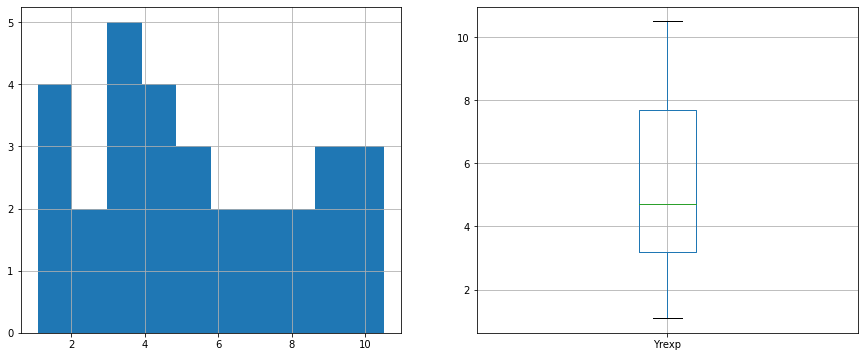

In [8]:
#checking whether outliers are present in YrExp column
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
df1['Yrexp'].hist()
plt.subplot(1,2,2)
df1.boxplot(column=['Yrexp'])

plt.show()

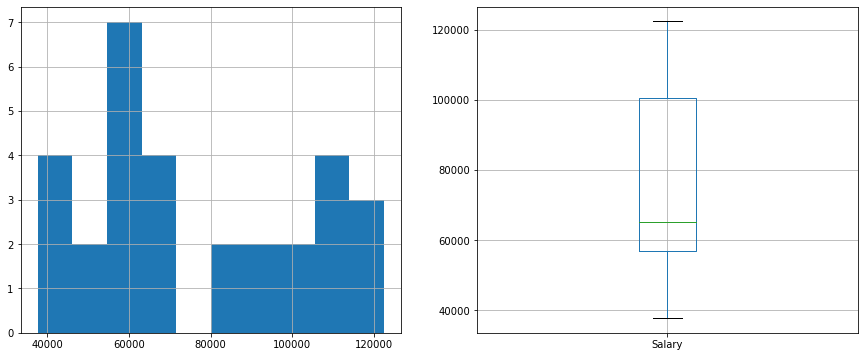

In [9]:
#checking whether outliers are present in Salary column
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
df1['Salary'].hist()
plt.subplot(1,2,2)
df1.boxplot(column=['Salary'])

plt.show()

#### From the above plots, we found that there is no outleirs present inside the YrExp and Salary data column 

## Cheking of distribution of data using distplot¶ 

<AxesSubplot:xlabel='Yrexp', ylabel='Density'>

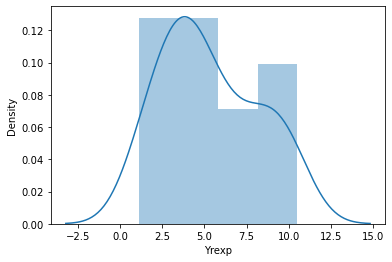

In [10]:
sns.distplot(df1['Yrexp'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

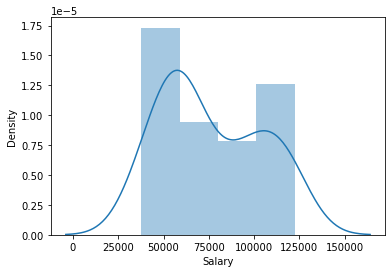

In [11]:
sns.distplot(df1['Salary'])

## Try to fit in a model for Salary_hike

## Predict a model without applying transformation

In [12]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~Yrexp",data = df1).fit()

<AxesSubplot:xlabel='Yrexp', ylabel='Salary'>

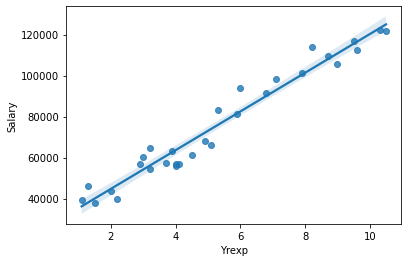

In [13]:
sns.regplot(x="Yrexp", y="Salary", data = df1 )

## Coefficients

In [14]:
model.params

Intercept    25792.200199
Yrexp         9449.962321
dtype: float64

In [15]:
#t & p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    11.346940
Yrexp        24.950094
dtype: float64 
 Intercept    5.511950e-12
Yrexp        1.143068e-20
dtype: float64


In [16]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Fri, 01 Jul 2022   Prob (F-statistic):           1.14e-20
Time:                        20:34:26   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
Yrexp       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Model Predictions

In [18]:
#Manual Predictions for 3 years experience
Salary = (25792.200199) + (9449.962321)*(3)

In [19]:
Salary

54142.087162

In [20]:
#Automatic Prediction for suppose 3 & 5 years experience
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [28]:
data_pred=pd.DataFrame(new_data,columns=['Yrexp'])
data_pred

,Yrexp
0,3
1,5


In [31]:
model.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64

# ======================== The End =============================